<a href="https://colab.research.google.com/github/mdalarmansorker/AI-Generated-Text-Detection/blob/main/AI_text_detection_with_decision_tree_after_removing_google_bard_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [2]:
!pip install -U -q PyDrive

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='AI generated fake text detection.csv'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('AI generated fake text detection.csv')

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('AI generated fake text detection.csv')
df

,Timestamp,Original text,ChatGPT Generated Text,Google Bard Generated Text
0,8/11/2023 0:55:39,"In this paper, we consider the transmission of...",This paper explores the transmission of confid...,"In this paper, we study the secure transmissio..."
1,8/11/2023 0:57:27,Wireless transmission frequently deals with ch...,Channels exhibiting multipath fading are a com...,Wireless transmission often encounters channel...
2,8/11/2023 0:58:39,A range of relatively simple and accurate stat...,Scientists have put forth a variety of statist...,Scientists have proposed a variety of relative...
3,8/11/2023 1:00:01,A statistical model was established in [1] whe...,"In reference [1], a statistical model was form...","In [1], a statistical model was developed that..."
4,8/11/2023 1:01:33,Barros and Rodrigues characterized secrecy cap...,"In their work [2], Barros and Rodrigues introd...","In [2], Barros and Rodrigues defined secrecy c..."
...,...,...,...,...
722,8/28/2023 10:42:24,Our experimental design includes several simul...,Our experimental design encompasses a range of...,Our experimental design includes several simul...
723,8/28/2023 10:44:07,"In Section 2, we briefly describe datasets and...","In Section 2, we provide a concise overview of...","In Section 2, we briefly describe the datasets..."
724,8/28/2023 10:45:18,"In Section 3, we describe the extensive experi...","In Section 3, we detail the comprehensive expe...","In Section 3, we describe the extensive experi..."
725,9/11/2023 21:30:57,The computerization of our society has substan...,The computerization of our society has greatly...,The computerization of our society has had a m...


**Creating a new dataset**

In [6]:
data = pd.DataFrame(columns=['Text','Label'])
data

,Text,Label


In [7]:
df = pd.DataFrame(df)

**Append orginal test to it with label 0**

In [8]:
for datas in df['Original text ']:
    data = data._append({'Text': datas,'Label': 0},ignore_index=True)

data

,Text,Label
0,"In this paper, we consider the transmission of...",0
1,Wireless transmission frequently deals with ch...,0
2,A range of relatively simple and accurate stat...,0
3,A statistical model was established in [1] whe...,0
4,Barros and Rodrigues characterized secrecy cap...,0
...,...,...
722,Our experimental design includes several simul...,0
723,"In Section 2, we briefly describe datasets and...",0
724,"In Section 3, we describe the extensive experi...",0
725,The computerization of our society has substan...,0


**Append AI generated data to it with label 1**

In [9]:
for datas in df['ChatGPT Generated Text']:
    data = data._append({'Text': datas,'Label': 1},ignore_index=True)

# for datas in df['Google Bard Generated Text']:
#     data = data._append({'Text': datas,'Label': 1},ignore_index=True)

In [10]:
data

,Text,Label
0,"In this paper, we consider the transmission of...",0
1,Wireless transmission frequently deals with ch...,0
2,A range of relatively simple and accurate stat...,0
3,A statistical model was established in [1] whe...,0
4,Barros and Rodrigues characterized secrecy cap...,0
...,...,...
1449,Our experimental design encompasses a range of...,1
1450,"In Section 2, we provide a concise overview of...",1
1451,"In Section 3, we detail the comprehensive expe...",1
1452,The computerization of our society has greatly...,1


In [11]:
!pip install pytorch_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 17.0 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=692db43b36c3e4d6c2094d3c355f4e297571f231f00c90dcbc110c24618afdc6
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling u

In [12]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [13]:
# Sample data preprocessing function
def preprocess_text(texts, labels):
    tokenizer = Tokenizer(num_words=10000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    sequences = pad_sequences(sequences, maxlen=100)  # Adjust maxlen as needed
    return sequences, labels

In [14]:
data

,Text,Label
0,"In this paper, we consider the transmission of...",0
1,Wireless transmission frequently deals with ch...,0
2,A range of relatively simple and accurate stat...,0
3,A statistical model was established in [1] whe...,0
4,Barros and Rodrigues characterized secrecy cap...,0
...,...,...
1449,Our experimental design encompasses a range of...,1
1450,"In Section 2, we provide a concise overview of...",1
1451,"In Section 3, we detail the comprehensive expe...",1
1452,The computerization of our society has greatly...,1


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from wordcloud import WordCloud #Word visualization
from nltk import word_tokenize
nltk.download('stopwords')
import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
## Text transformation
data["lower"]=data.Text.str.lower() #lowercase
data["lower"]=[str(data) for data in data.lower] #converting all to string
data["lower"]=data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [17]:
data

,Text,Label,lower
0,"In this paper, we consider the transmission of...",0,in this paper we consider the transmission of...
1,Wireless transmission frequently deals with ch...,0,wireless transmission frequently deals with ch...
2,A range of relatively simple and accurate stat...,0,a range of relatively simple and accurate stat...
3,A statistical model was established in [1] whe...,0,a statistical model was established in 1 whe...
4,Barros and Rodrigues characterized secrecy cap...,0,barros and rodrigues characterized secrecy cap...
...,...,...,...
1449,Our experimental design encompasses a range of...,1,our experimental design encompasses a range of...
1450,"In Section 2, we provide a concise overview of...",1,in section 2 we provide a concise overview of...
1451,"In Section 3, we detail the comprehensive expe...",1,in section 3 we detail the comprehensive expe...
1452,The computerization of our society has greatly...,1,the computerization of our society has greatly...


***Original Text Count***

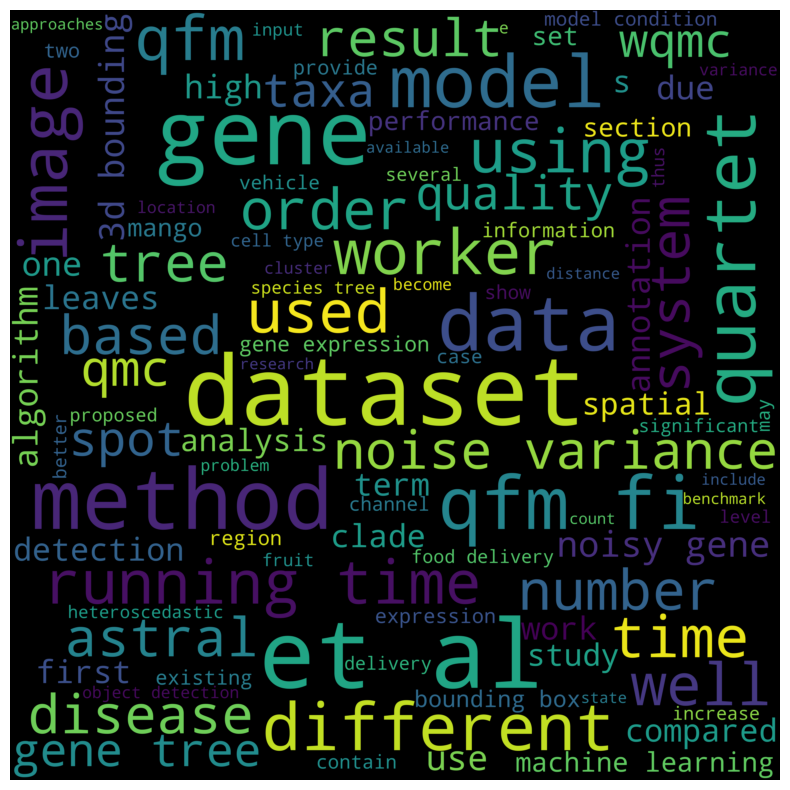

In [18]:
word_cloud_text = ''.join(data[data["Label"]==0].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***AI Generated Wordcloud***

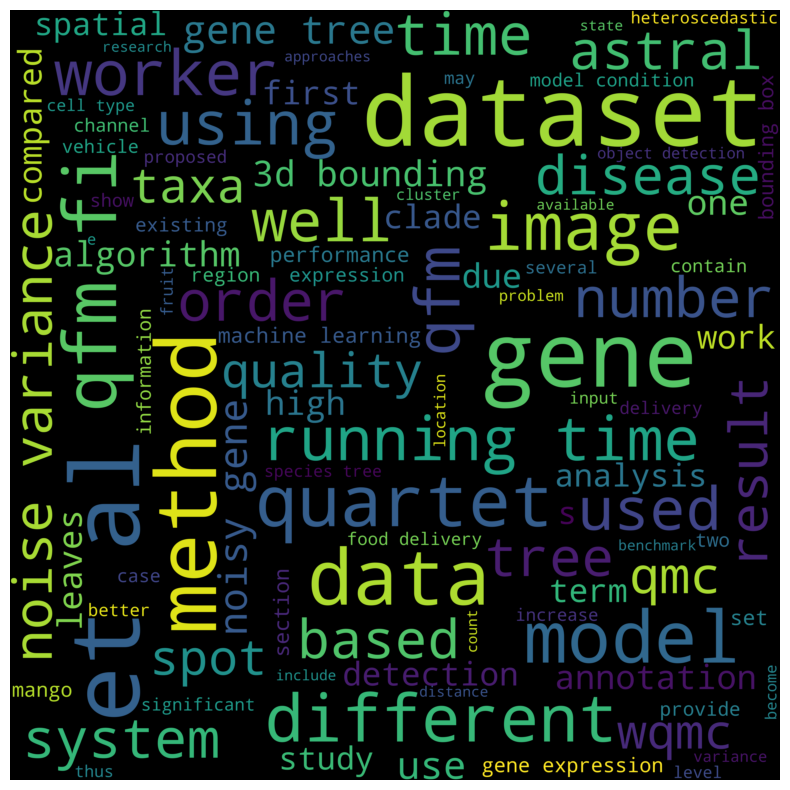

In [19]:
word_cloud_text = ''.join(data[data["Label"]==0].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***Counting Original texts and AI generated texts***

<Axes: xlabel='Label', ylabel='count'>

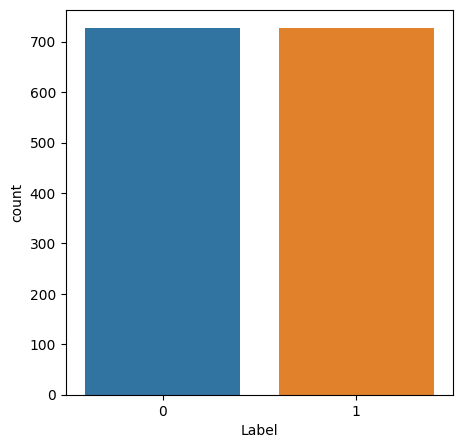

In [20]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Label', data = data)

In [21]:
texts = data['Text']

In [22]:
text_lens = [len(t.split()) for t in texts.values]
len_mean = np.mean(text_lens)
len_mean

25.35900962861073

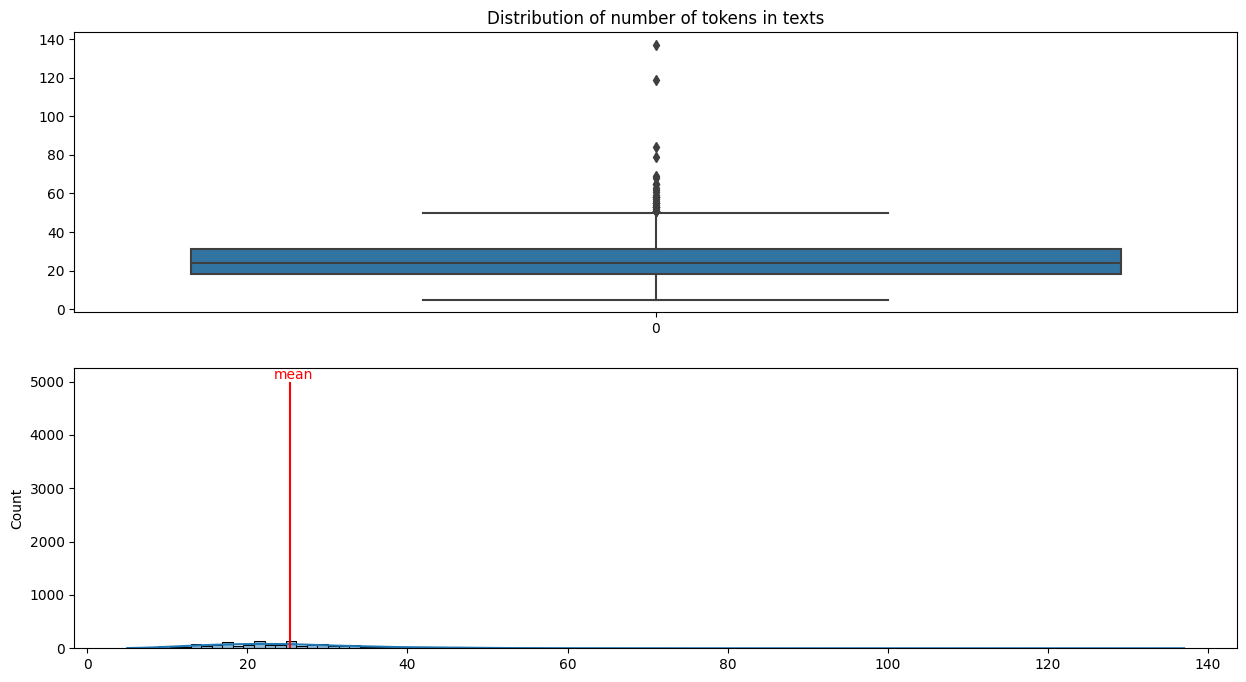

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in texts')
sns.boxplot(text_lens, ax=axes[0])
sns.histplot(text_lens, bins=100, kde=True, ax=axes[1])
axes[1].vlines(len_mean, 0, 5000, color = 'r')
plt.annotate("mean", xy=(len_mean, 5000), xytext=(len_mean-2, 5050),
            color='r')
plt.show()

***Find Unique Word***

In [24]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7d649deae4d0>)

In [28]:
#Train - Test splitting
X = data['lower']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [44]:
# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 64.26116838487972


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[96 53]
 [51 91]]


              precision    recall  f1-score   support

           0       0.65      0.64      0.65       149
           1       0.63      0.64      0.64       142

    accuracy                           0.64       291
   macro avg       0.64      0.64      0.64       291
weighted avg       0.64      0.64      0.64       291

